In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [3]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35,36
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil."
url,None,https://t.co/gX4oRZWHg3,https://t.co/KkaPlVH4Wu,https://t.co/hDni4Fh2Ng,https://t.co/YJQuDtv2YW,https://t.co/3yZ94QNQvs,https://t.co/MtUeSEBICu,https://t.co/QU71LJgSuD,None,https://t.co/AmkOKWlftK,https://t.co/JWBzdmQOcV


In [4]:
def create_tweets_pd(data, id_user):

    tweets_by_month = {}

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[18]
    
    tweets_pd.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]
 
    return tweets_pd

In [5]:
def create_line_plot(df_result, id_user):
    df_result["created_at"] = pd.to_datetime(df_result["created_at"])
    df_result['date_minus_time'] = df_result["created_at"].apply( lambda df_result : datetime.datetime(year=df_result.year, month=df_result.month, day=df_result.day))
    df_result.set_index(df_result["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(df_result['final_score'].resample('W').mean())

    new_df['week'] = range(1, len(new_df.index) + 1)

    x = new_df["week"]
    y = new_df["final_score"]

    tickvalues = range(0, int(len(x)), 2)

    if len(tickvalues) > len(x[1::2]):
        tickvalues = range(0, int(len(x)) - (len(tickvalues) - len(x[1::2])), 2)

    fig = plt.figure(figsize=(16,6))

    plt.xticks(ticks = tickvalues ,labels = x[1::2], rotation = 'vertical')

    plt.title("Tweets polarity per week - Participant {}".format(id_user))
    plt.ylabel("Polarity")
    plt.xlabel("Weeks")

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

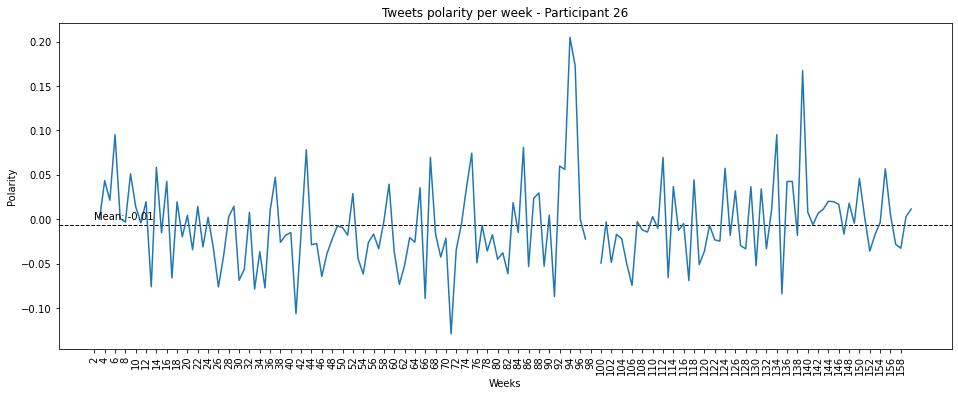

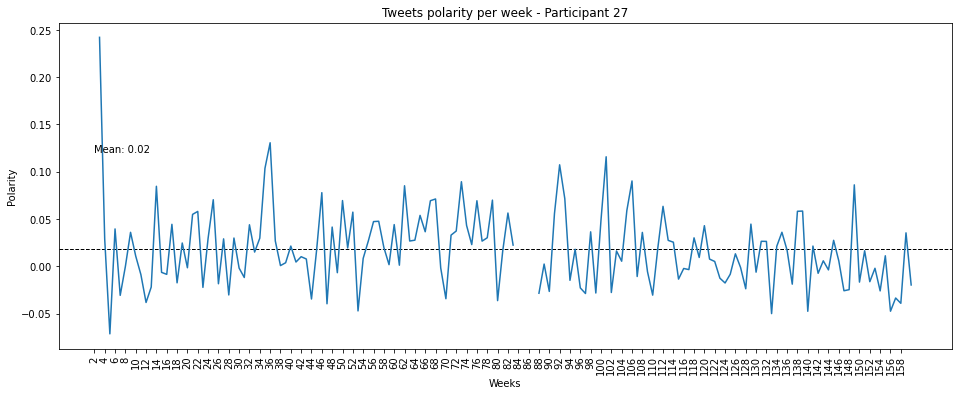

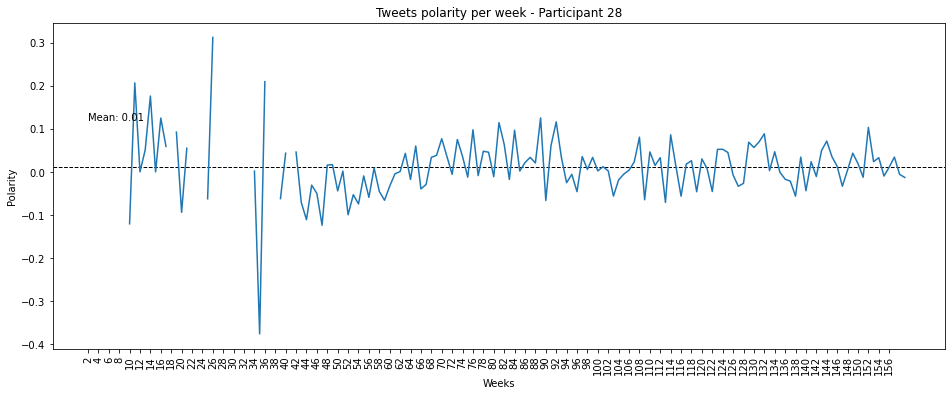

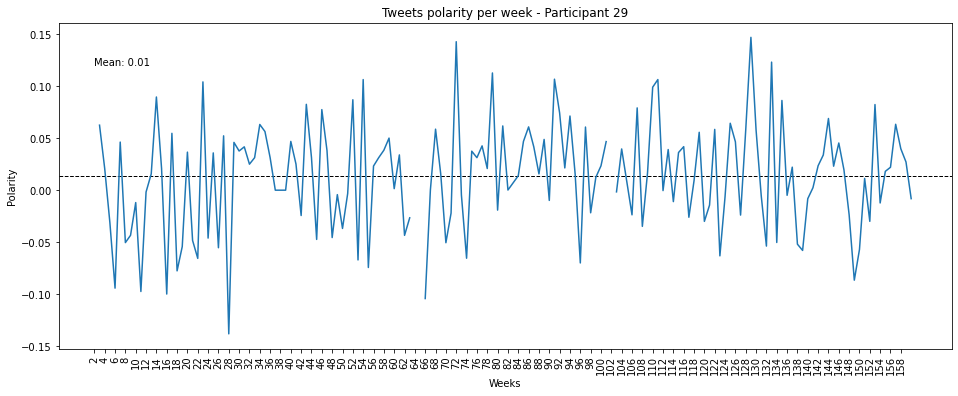

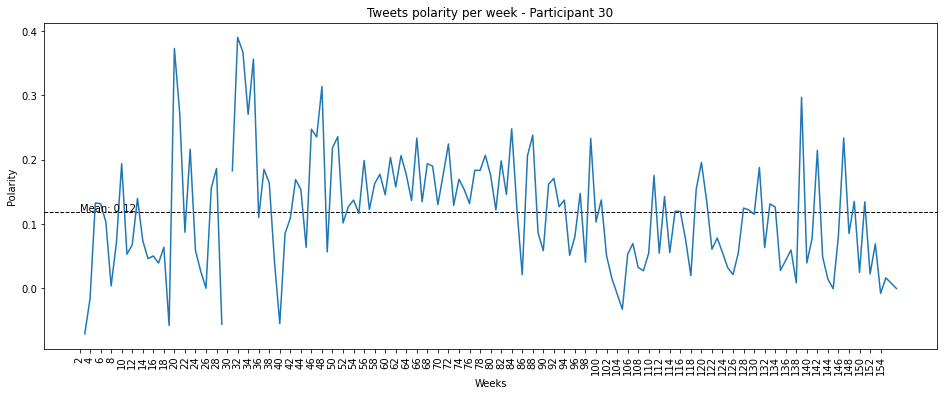

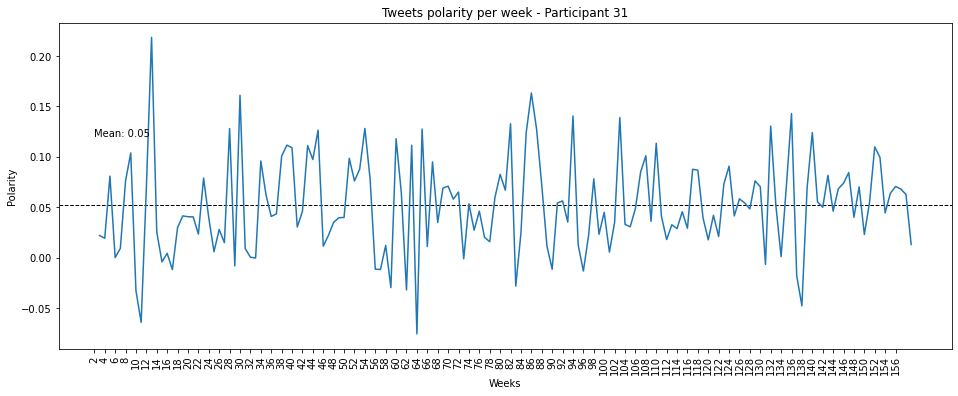

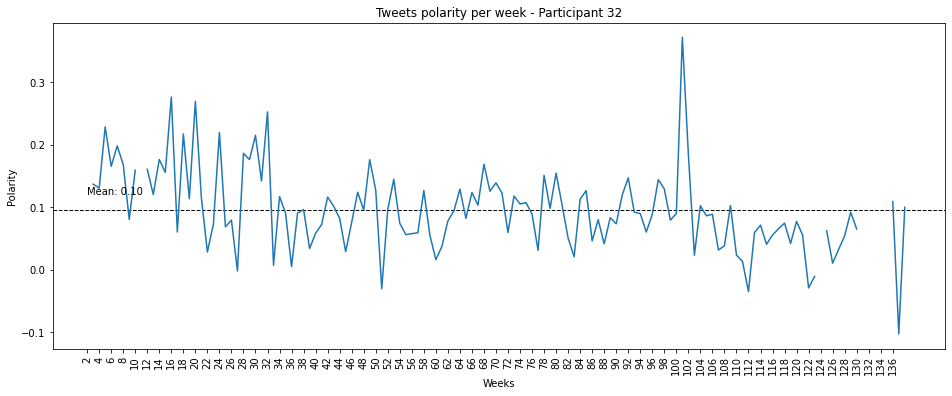

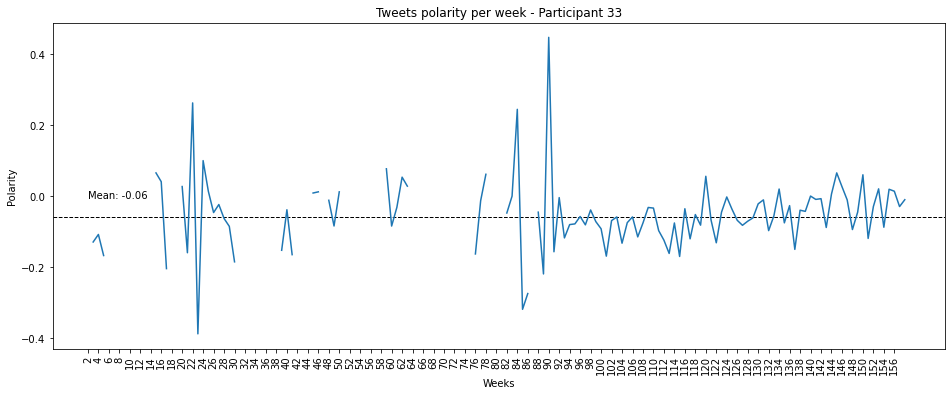

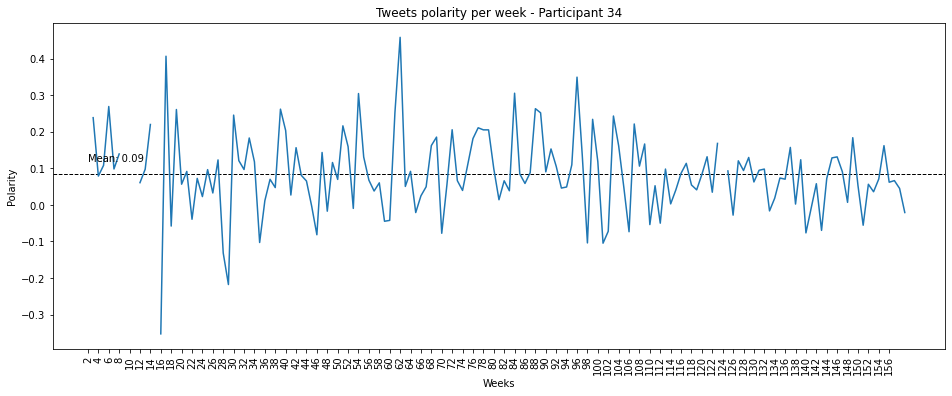

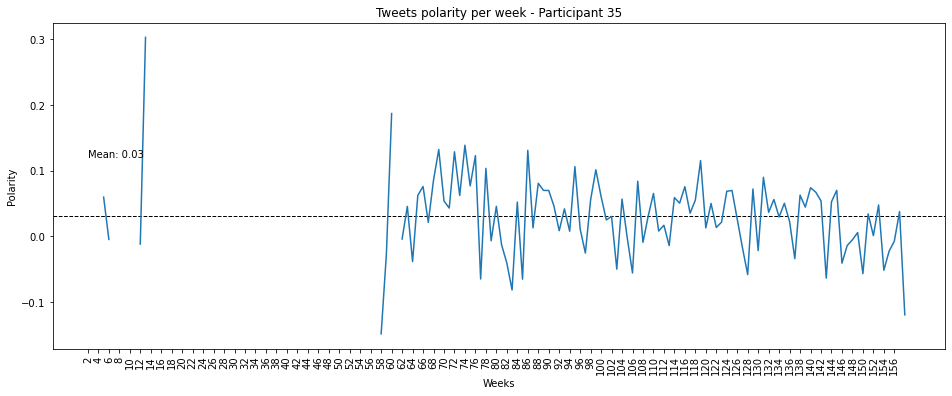

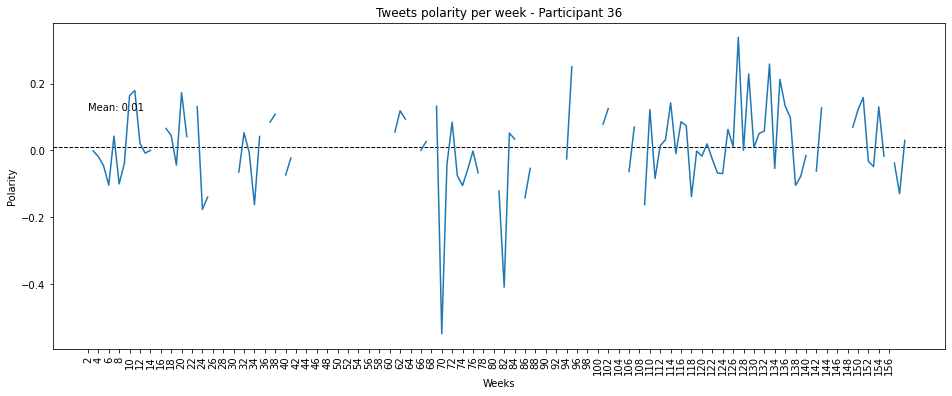

In [6]:
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    
    create_line_plot(tweets_pd, id_user)

In [7]:
# DATA CONSIDERING THE NEUTRAL POLARITY

df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : []
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: all')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', 'final_score', 'final_polarity']].copy()
    print('mean: {}'.format(vader_df['final_score'].mean()))
    qtd_pos = vader_df.query('final_polarity == "pos"')['id_user'].count()
    qtd_neu = vader_df.query('final_polarity == "neu"')['id_user'].count()
    qtd_neg = vader_df.query('final_polarity == "neg"')['id_user'].count()
    qtd_total = vader_df['final_polarity'].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
    df_dict['mean'].append(vader_df['final_score'].mean())

df_chart = pd.DataFrame(df_dict)
df_chart
    

id_user: 26
lexicon: all
mean: -0.00996554810875171
pos: 1991
neu: 737
neg: 2311
% pos: 39.51180789839254
% neu: 14.625917840841437
% neg: 45.86227426076602

id_user: 27
lexicon: all
mean: 0.0113417968234777
pos: 2009
neu: 718
neg: 1822
% pos: 44.163552429105295
% neu: 15.783688722796219
% neg: 40.052758848098485

id_user: 28
lexicon: all
mean: 0.00986910406202596
pos: 2774
neu: 599
neg: 2560
% pos: 46.755435698634756
% neu: 10.096072813079386
% neg: 43.148491488285856

id_user: 29
lexicon: all
mean: 0.013734385562854595
pos: 1506
neu: 606
neg: 1237
% pos: 44.968647357420124
% neu: 18.09495371752762
% neg: 36.93639892505225

id_user: 30
lexicon: all
mean: 0.11796156769861296
pos: 2016
neu: 339
neg: 817
% pos: 63.55611601513241
% neu: 10.687263556116015
% neg: 25.756620428751575

id_user: 31
lexicon: all
mean: 0.05302113797148096
pos: 3342
neu: 470
neg: 2184
% pos: 55.73715810540361
% neu: 7.838559039359573
% neg: 36.424282855236825

id_user: 32
lexicon: all
mean: 0.077959142519621
pos:

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean
0,26,1991,737,2311,39.511808,14.625918,45.862274,-0.009966
1,27,2009,718,1822,44.163552,15.783689,40.052759,0.011342
2,28,2774,599,2560,46.755436,10.096073,43.148491,0.009869
3,29,1506,606,1237,44.968647,18.094954,36.936399,0.013734
4,30,2016,339,817,63.556116,10.687264,25.756620,0.117962
5,31,3342,470,2184,55.737158,7.838559,36.424283,0.053021
6,32,5445,744,2985,59.352518,8.109876,32.537606,0.077959
7,33,902,162,1267,38.695839,6.949807,54.354354,-0.052815
8,34,890,159,496,57.605178,10.291262,32.103560,0.079429
9,35,1170,478,947,45.086705,18.420039,36.493256,0.036479


In [8]:
# DATA WITHOUT THE NEUTRAL POLARITY

df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean_all' : [],
            'mean_posneg' : []
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: all')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', 'final_score', 'final_polarity']].copy()
    final_score = vader_df.query('final_polarity == "pos"')['final_score'].tolist()
    final_score.extend(vader_df.query('final_polarity == "neg"')['final_score'].tolist())
    print(len(final_score))
    print(statistics.mean(final_score))
    print('mean: {}'.format(vader_df['final_score'].mean()))
    qtd_pos = vader_df.query('final_polarity == "pos"')['id_user'].count()
    qtd_neu = vader_df.query('final_polarity == "neu"')['id_user'].count()
    qtd_neg = vader_df.query('final_polarity == "neg"')['id_user'].count()
    qtd_total = vader_df['final_polarity'].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
    df_dict['mean_all'].append(vader_df['final_score'].mean())
    df_dict['mean_posneg'].append(statistics.mean(final_score))

df_chart = pd.DataFrame(df_dict)
df_chart
    

id_user: 26
lexicon: all
4302
-0.011672802631334262
mean: -0.00996554810875171
pos: 1991
neu: 737
neg: 2311
% pos: 39.51180789839254
% neu: 14.625917840841437
% neg: 45.86227426076602

id_user: 27
lexicon: all
3831
0.01346745856173323
mean: 0.0113417968234777
pos: 2009
neu: 718
neg: 1822
% pos: 44.163552429105295
% neu: 15.783688722796219
% neg: 40.052758848098485

id_user: 28
lexicon: all
5334
0.010977389276340456
mean: 0.00986910406202596
pos: 2774
neu: 599
neg: 2560
% pos: 46.755435698634756
% neu: 10.096072813079386
% neg: 43.148491488285856

id_user: 29
lexicon: all
2743
0.016768668337586584
mean: 0.013734385562854595
pos: 1506
neu: 606
neg: 1237
% pos: 44.968647357420124
% neu: 18.09495371752762
% neg: 36.93639892505225

id_user: 30
lexicon: all
2833
0.1320769829650547
mean: 0.11796156769861296
pos: 2016
neu: 339
neg: 817
% pos: 63.55611601513241
% neu: 10.687263556116015
% neg: 25.756620428751575

id_user: 31
lexicon: all
5526
0.05753071720539269
mean: 0.05302113797148096
pos: 3

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean_all,mean_posneg
0,26,1991,737,2311,39.511808,14.625918,45.862274,-0.009966,-0.011673
1,27,2009,718,1822,44.163552,15.783689,40.052759,0.011342,0.013467
2,28,2774,599,2560,46.755436,10.096073,43.148491,0.009869,0.010977
3,29,1506,606,1237,44.968647,18.094954,36.936399,0.013734,0.016769
4,30,2016,339,817,63.556116,10.687264,25.756620,0.117962,0.132077
5,31,3342,470,2184,55.737158,7.838559,36.424283,0.053021,0.057531
6,32,5445,744,2985,59.352518,8.109876,32.537606,0.077959,0.084840
7,33,902,162,1267,38.695839,6.949807,54.354354,-0.052815,-0.056760
8,34,890,159,496,57.605178,10.291262,32.103560,0.079429,0.088541
9,35,1170,478,947,45.086705,18.420039,36.493256,0.036479,0.044716


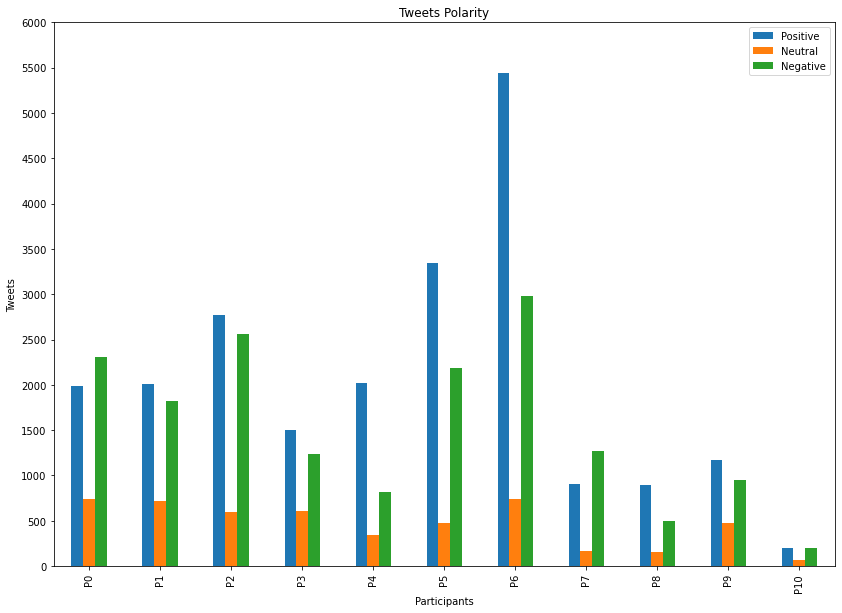

In [9]:
# multiple bar plots

bar_chart_data = []

y_range = range(0,6001, 500)

for i in df_chart.index:
    d = ['P{}'.format(i), df_chart.iloc[i]['pos'], df_chart.iloc[i]['neu'], df_chart.iloc[i]['neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","pos","neu","neg"])
df.plot(yticks = y_range, x="Participant", y=["pos", "neu", "neg"], kind="bar",figsize=(14,10))

plt.legend(["Positive", "Neutral", "Negative"])
plt.title('Tweets Polarity')
plt.xlabel('Participants')
plt.ylabel('Tweets')

plt.show()

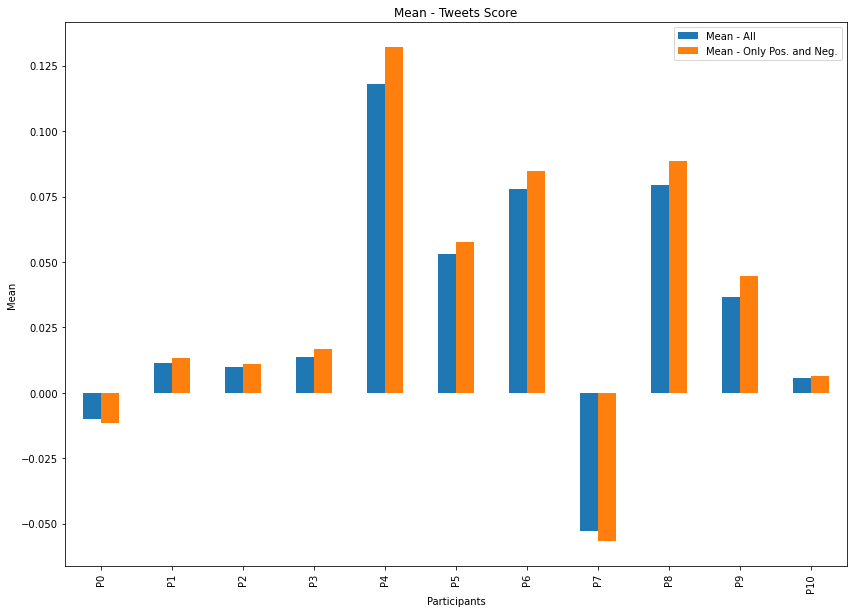

In [10]:
# multiple bar plots with means

bar_chart_data = []

y_range = range(-1,1)

for i in df_chart.index:
    d = ['P{}'.format(i), df_chart.iloc[i]['mean_all'], df_chart.iloc[i]['mean_posneg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","mean_all","mean_posneg"])
df.plot(x="Participant", y=["mean_all", "mean_posneg"], kind="bar",figsize=(14,10))

plt.legend(["Mean - All", "Mean - Only Pos. and Neg."])
plt.title('Mean - Tweets Score')
plt.xlabel('Participants')
plt.ylabel('Mean')

plt.show()

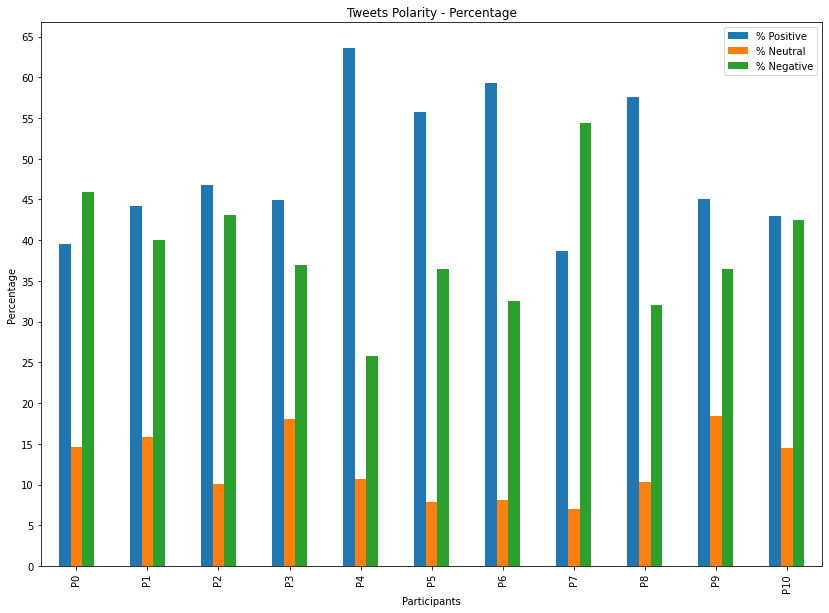

In [11]:
# multiple line plots

bar_chart_data = []

y_range = range(0, 70, 5)

for i in df_chart.index:
    d = ['P{}'.format(i), df_chart.iloc[i]['por_pos'], df_chart.iloc[i]['por_neu'], df_chart.iloc[i]['por_neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","por_pos","por_neu","por_neg"])
df.plot(yticks = y_range, x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(14,10))


plt.legend(['% Positive', '% Neutral', '% Negative'])
plt.title('Tweets Polarity - Percentage')
plt.xlabel('Participants')
plt.ylabel('Percentage')

plt.show()

In [12]:
bigfive = {}

for c in data:
    id_user = c

    df_bf = pd.DataFrame(data[id_user]['bigfive'])
    
    if df_bf.empty == False:
        id = int(df_bf[6])

        del df_bf[0]
        del df_bf[6]

        df_bf.columns = ['O', 'C', 'E', 'A', 'N']

        bigfive[id] = df_bf

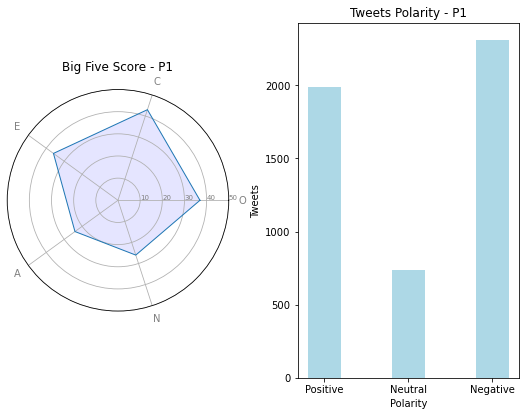

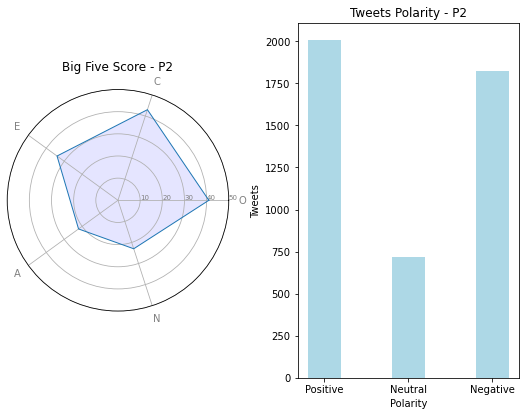

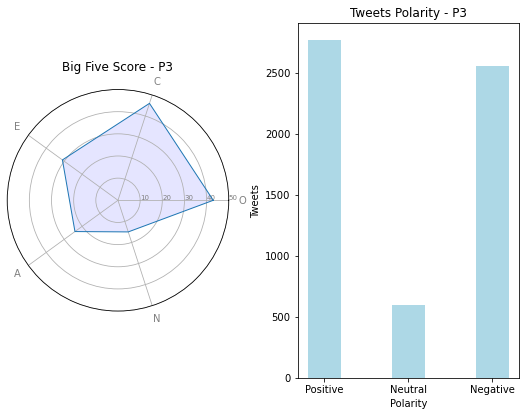

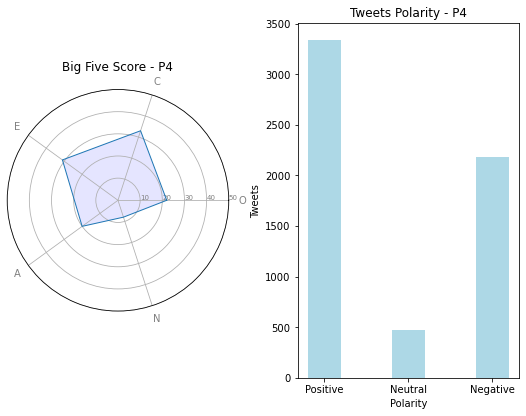

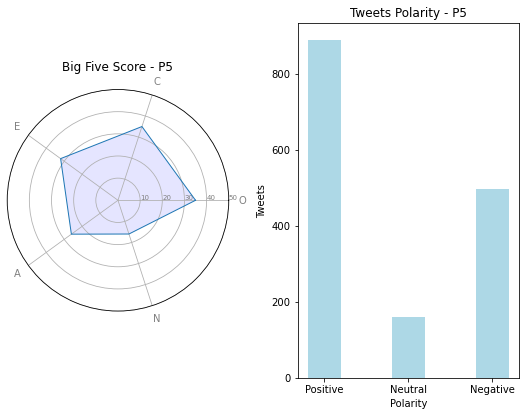

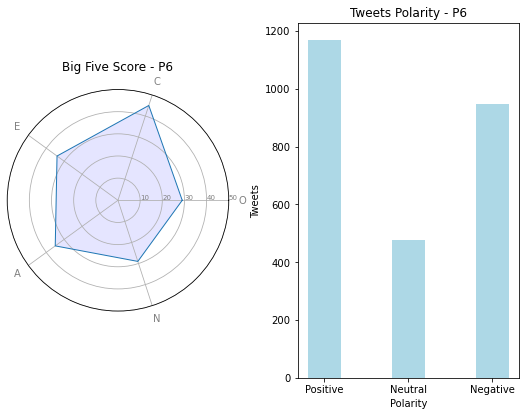

In [13]:
count = 1

for i in bigfive:
    b = bigfive[i]

    o = [b['O']]
    c = [b['C']]
    e = [b['E']]
    a = [b['A']]
    n = [b['N']]

    # Set data
    df = pd.DataFrame({
    'group': ['A'],
    'O': o,
    'C': c,
    'E': e,
    'A': a,
    'N': n
    })

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    
    fig = plt.figure(figsize=(8, 6))
    gs = GridSpec(nrows=1, ncols=2)
    
    # Initialise the spider plot
    ax = fig.add_subplot(gs[0, 0])
    ax = plt.subplot(121, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30, 40, 50], ["10","20","30", '40', '50'], color="grey", size=7)
    plt.ylim(0,50)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title('Big Five Score - P{}'.format(count))
    
#     plt.tight_layout()

    # Show the graph
#     plt.show()
    
    plt.subplot(122)
    
    y_range = range(0,6001, 500)

    d = {"Positive": int(df_chart.query('id_user == {}'.format(i))['pos']), 
         "Neutral": int(df_chart.query('id_user == {}'.format(i))['neu']), 
         "Negative": int(df_chart.query('id_user == {}'.format(i))['neg'])}
    
#     plt.figure(figsize = (8, 6))

    plt.tight_layout(pad=2.8)
#     plt.subplot_tool()
 
    # creating the bar plot
    plt.bar(d.keys(), d.values(), width = 0.4, color = 'lightblue')

    plt.title('Tweets Polarity - P{}'.format(count))
    plt.xlabel('Polarity')
    plt.ylabel('Tweets')

    plt.show()
    
    count += 1

In [14]:
df_chart

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean_all,mean_posneg
0,26,1991,737,2311,39.511808,14.625918,45.862274,-0.009966,-0.011673
1,27,2009,718,1822,44.163552,15.783689,40.052759,0.011342,0.013467
2,28,2774,599,2560,46.755436,10.096073,43.148491,0.009869,0.010977
3,29,1506,606,1237,44.968647,18.094954,36.936399,0.013734,0.016769
4,30,2016,339,817,63.556116,10.687264,25.756620,0.117962,0.132077
5,31,3342,470,2184,55.737158,7.838559,36.424283,0.053021,0.057531
6,32,5445,744,2985,59.352518,8.109876,32.537606,0.077959,0.084840
7,33,902,162,1267,38.695839,6.949807,54.354354,-0.052815,-0.056760
8,34,890,159,496,57.605178,10.291262,32.103560,0.079429,0.088541
9,35,1170,478,947,45.086705,18.420039,36.493256,0.036479,0.044716


[Text(1, 0, 'Positive'), Text(2, 0, 'Negative'), Text(3, 0, 'Neutral')]

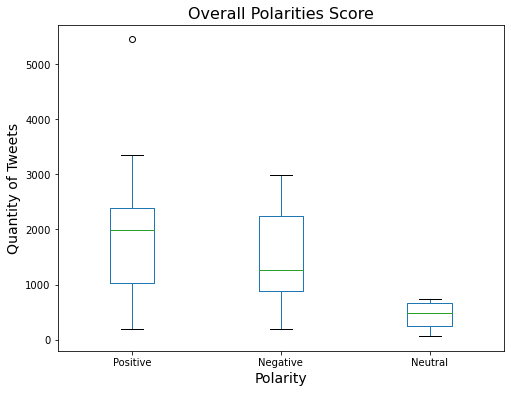

In [15]:
bplot = df_chart.boxplot(column=['pos', 'neg', 'neu'], grid=False, figsize=(8,6))

bplot.axes.set_title("Overall Polarities Score", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("Quantity of Tweets", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive', 'Negative', 'Neutral'])

[Text(1, 0, 'Positive (%)'),
 Text(2, 0, 'Negative (%)'),
 Text(3, 0, 'Neutral (%)')]

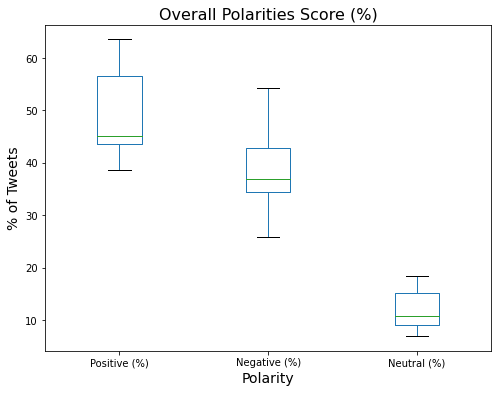

In [16]:
bplot = df_chart.boxplot(column=['por_pos', 'por_neg', 'por_neu'], grid=False, figsize=(8,6))

bplot.axes.set_title("Overall Polarities Score (%)", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("% of Tweets", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive (%)', 'Negative (%)', 'Neutral (%)'])

[Text(1, 0, 'All Polarities'), Text(2, 0, 'Only Positives and Negatives')]

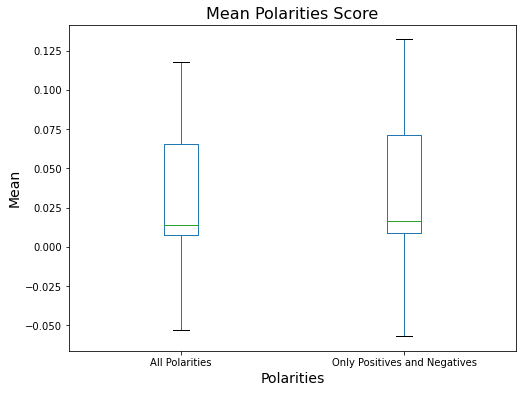

In [17]:
bplot = df_chart.boxplot(column=['mean_all', 'mean_posneg'], grid=False, figsize=(8,6))

bplot.axes.set_title("Mean Polarities Score", fontsize=16)
 
bplot.set_xlabel("Polarities", fontsize=14) 
bplot.set_ylabel("Mean", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['All Polarities', 'Only Positives and Negatives'])

In [26]:
def plot_point_chart(df, count, id_user):

    first_date = df.iloc[0]['date_minus_time']
    
    for i in range(1,13):
        end_date = first_date + relativedelta(months=+3)
        mask = (df['created_at'] >= first_date) & (df['created_at'] < end_date)
        new_df = df.loc[mask]
        
        fig, ax = plt.subplots(figsize=(24, 8))
    
        x = new_df['date_minus_time']
        y = new_df['final_score']

        x_ticks = x

        colors = {'pos':'green', 'neu':'orange', 'neg':'red'}

        plt.yticks(np.arange(-1.0, 1.0, 0.1), fontsize=16)
        plt.xticks(x_ticks, rotation='vertical', fontsize=16)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
        plt.xlabel('Day', fontsize=16)
        plt.ylabel('Polarity Score', fontsize=16)
        
        plt.title('Scatter Plot for P{}, User{} - From {} To {}'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")), fontsize=20)

        plt.scatter(x, y, alpha=0.7, c=new_df['final_polarity'].map(colors))
        
        first_date = end_date

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


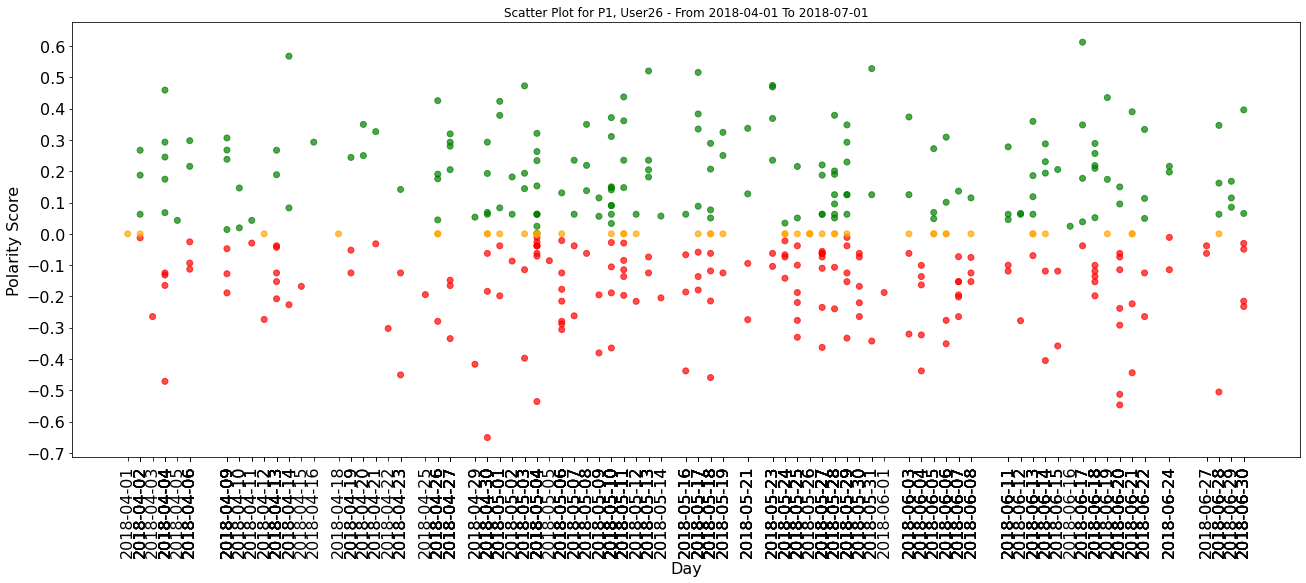

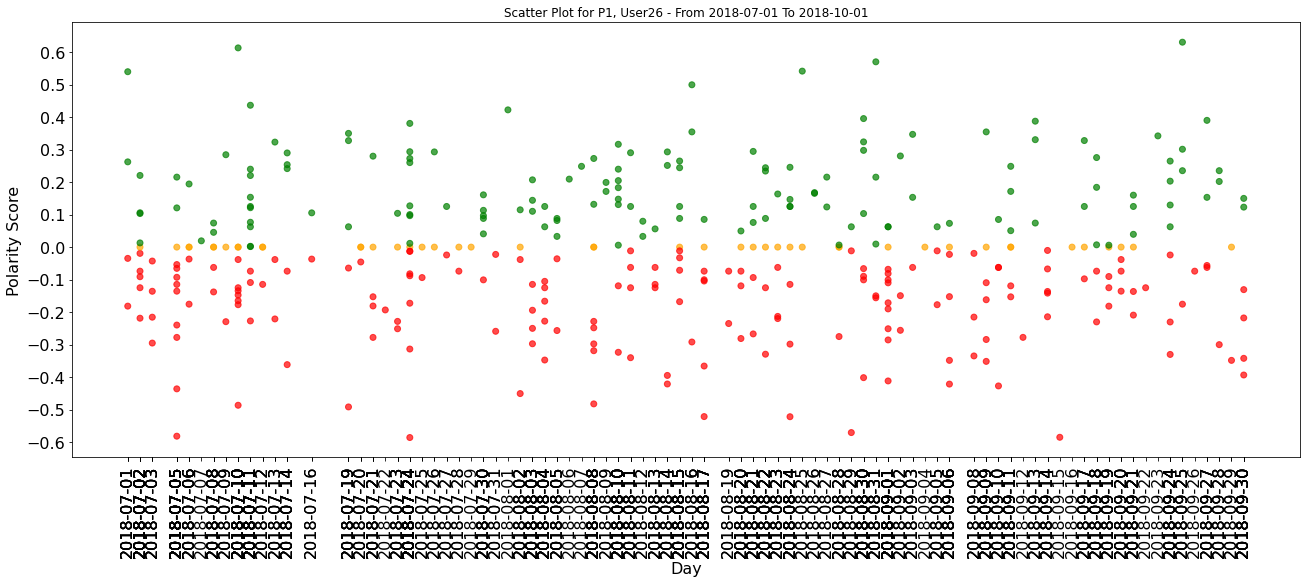

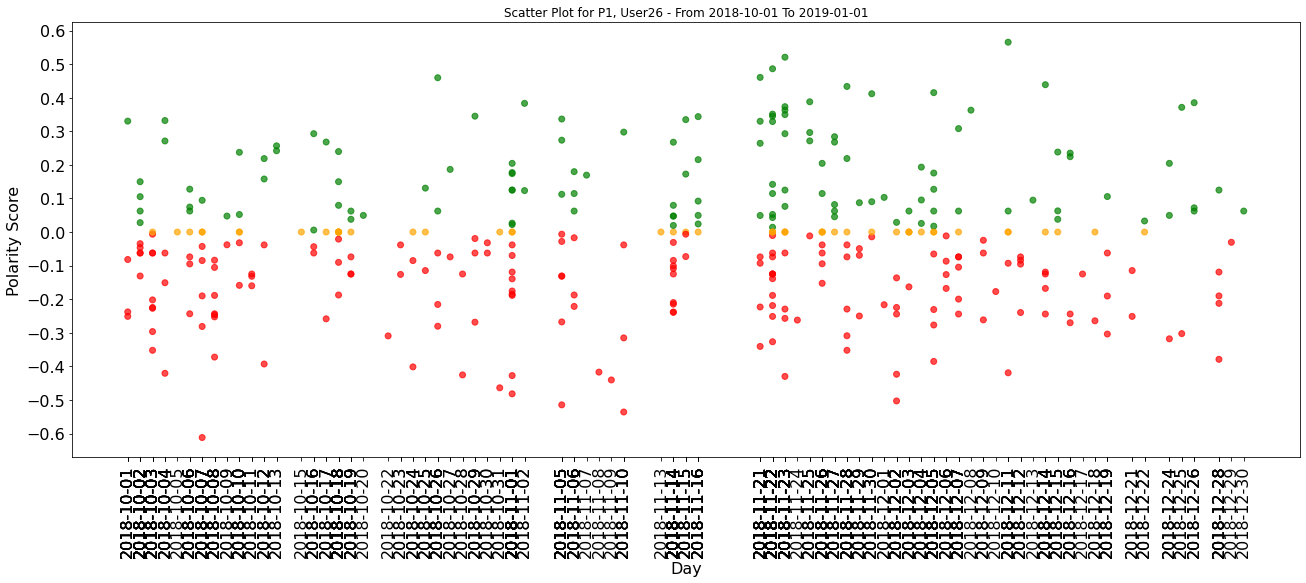

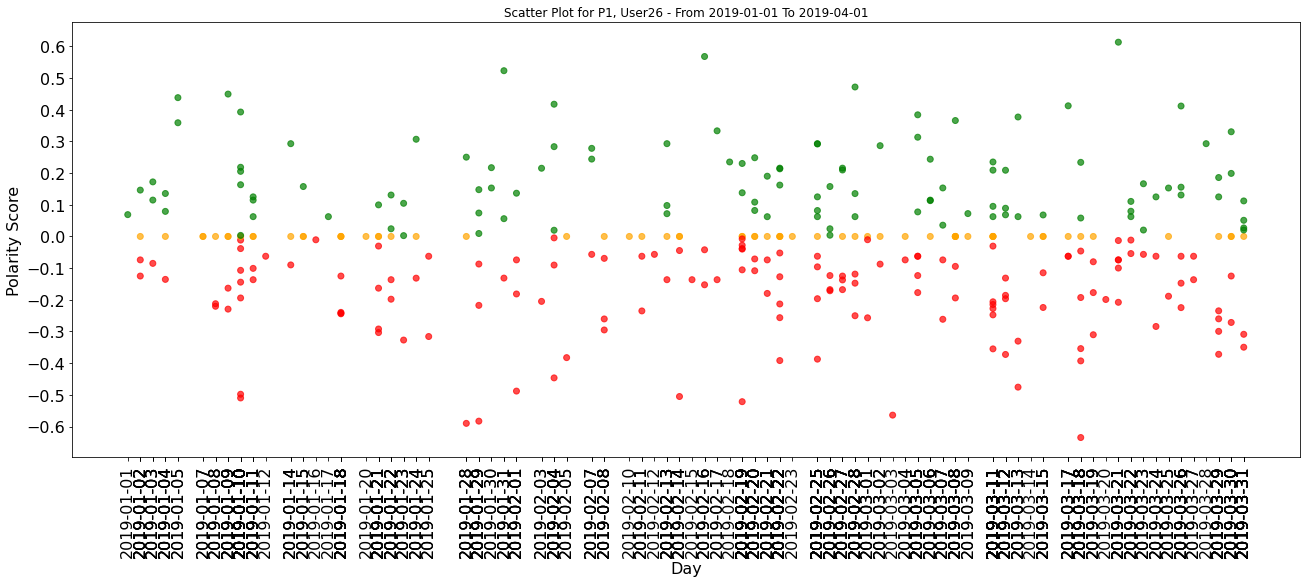

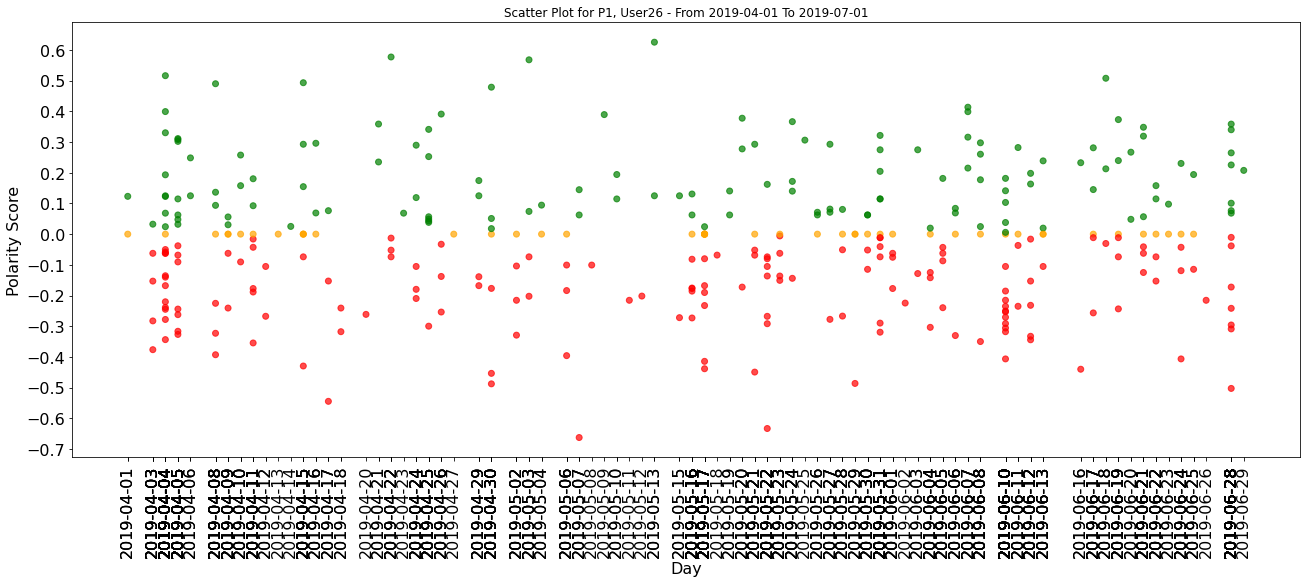

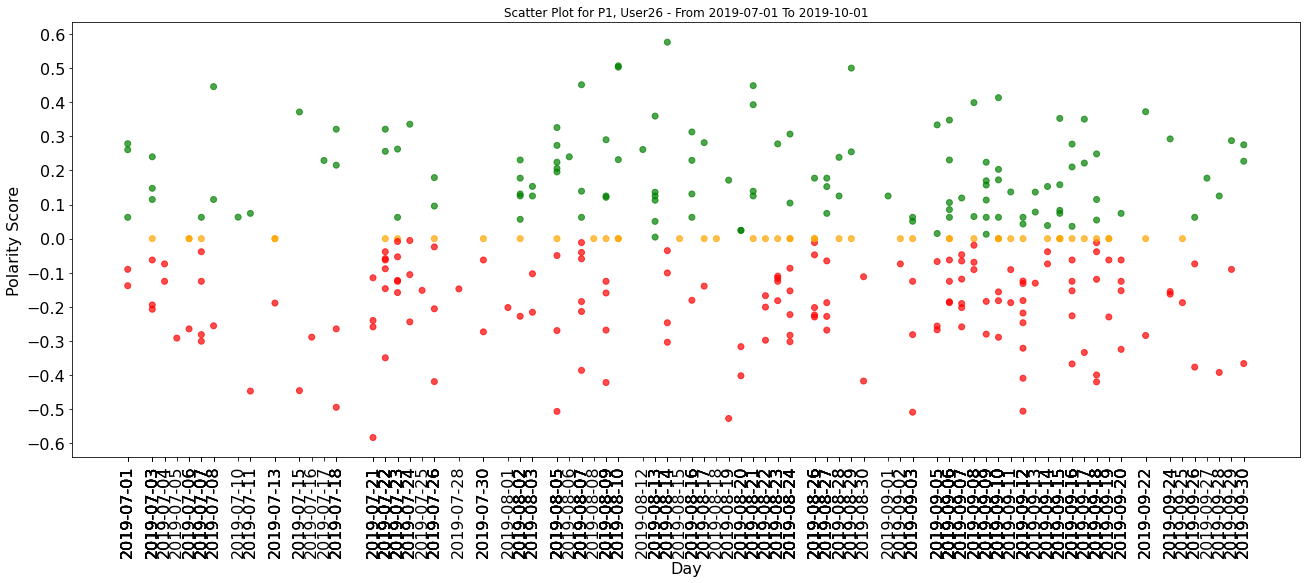

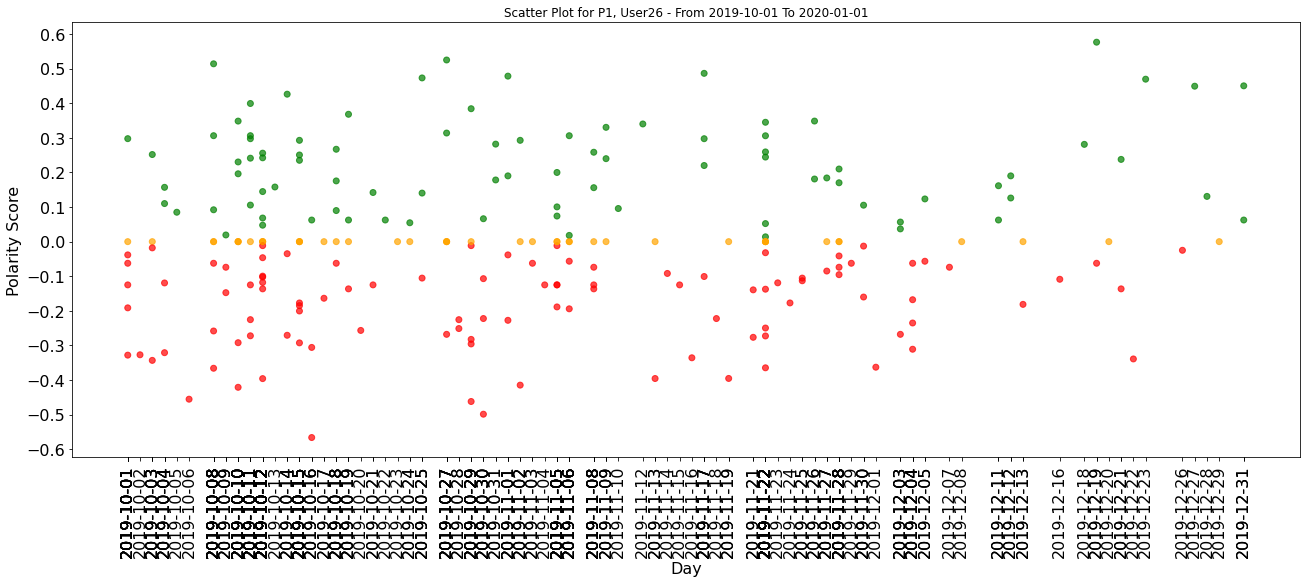

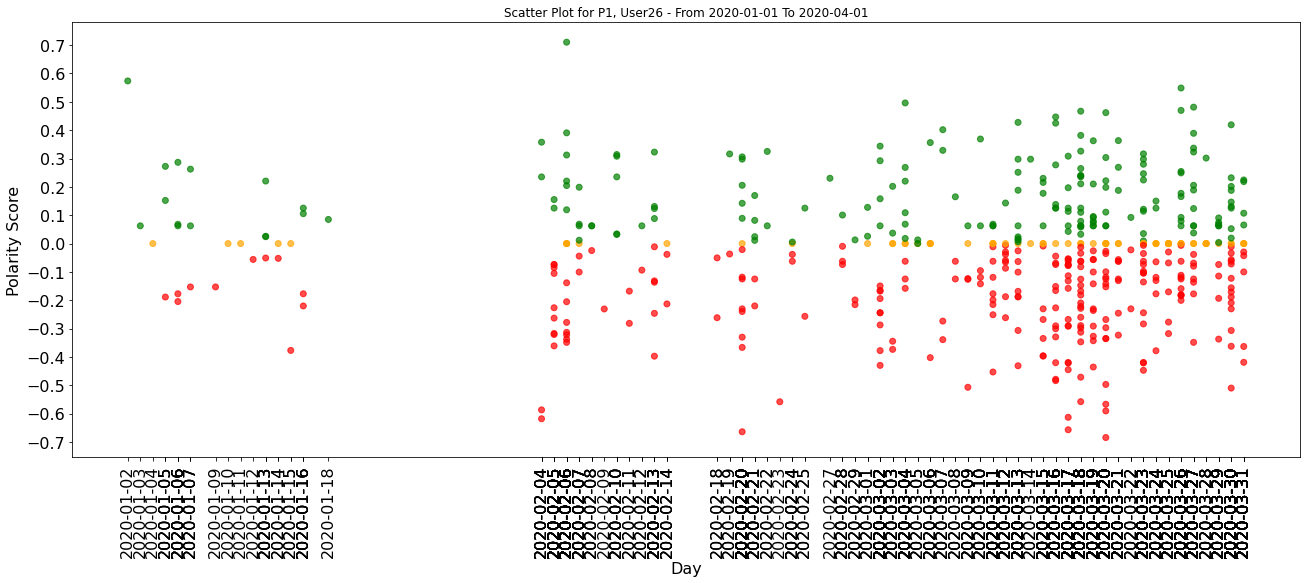

Error in callback <function flush_figures at 0x7fb6b32c2f80> (for post_execute):


KeyboardInterrupt: 

In [25]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    del df['text']
    del df['vader_sentiment_analysis_score']
    del df['vader_sentiment_analysis_polarity']
    del df['oplexicon_sentiment_analysis_score']
    del df['oplexicon_sentiment_analysis_polarity']
    del df['sentistrength_sentiment_analysis_score']
    del df['sentistrength_sentiment_analysis_polarity']
    del df['sentilexpt_sentiment_analysis_score']
    del df['sentilexpt_sentiment_analysis_polarity']
    
    df = df.sort_values(by='created_at')
    
    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
#     df.set_index(df["date_minus_time"],inplace=True)
    
    plot_point_chart(df, count, id_user)
    
    count += 1